## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
study_results.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [6]:
# We're informed there are duplicate IDs and time points.  Therefore, create a new df to remove the duplicates.
## Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.
## Getting the Mouse ID numbers that show up with duplicate Timepoints. 
## Optional: Display all the data for the duplicate mouse ID.
study_results_unique = pd.DataFrame(study_results)
study_results_unique = study_results_unique.drop_duplicates(subset=['Mouse ID','Timepoint'])

In [7]:
# Combine the data into a single dataset
study_data_ugly = pd.merge(mouse_metadata, study_results_unique, how = "inner", on =["Mouse ID"])
study_data = pd.DataFrame(study_data_ugly)
# Rename columns
### Why is this not working?
study_data.rename(columns={"Weight (g)":"Weight", "Tumor Volume (mm3)": "Tumor Volumn"})
# Change tumor volume to a number
study_data['Tumor Volume (mm3)'] = study_data['Tumor Volume (mm3)'].astype(float)

# Display the data table for preview
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame
mouse_count = study_data["Mouse ID"].nunique()
mouse_count

249

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mice_mean = study_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
mice_median = study_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
mice_variance = study_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
mice_std = study_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
mice_sem = study_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

# mice_variance = np.var(study_data, ddof = 0)
# mice_std = np.std(study_data, ddof = 0)
## variance is incorrect?
# mice_test = np.var(study_data, ddof = 0)
## std is incorrect?

mice_summary_df = pd.DataFrame({"Average": mice_mean, "Median": mice_median, "Variance": mice_variance, "Standard Deviation": mice_std, "SEM": mice_sem})
mice_summary_df

,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
mice_agg = study_data.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
mice_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

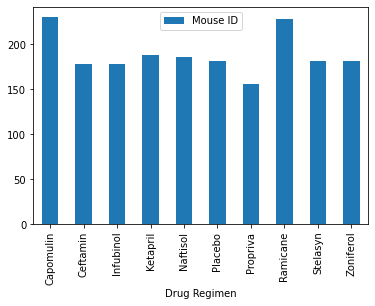

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_reg = pd.DataFrame(study_data.groupby('Drug Regimen')["Mouse ID"].count())
drug_plot_pandas = drug_reg.plot.bar()

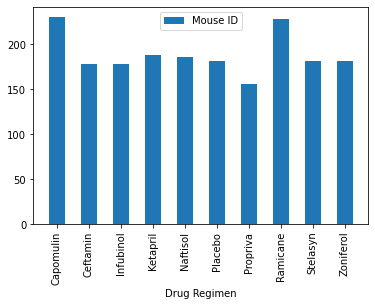

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = drug_reg.index.tolist()
y_data = drug_reg["Mouse ID"].tolist()


plt.bar(x_axis, y_data, width = .5)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.legend(['Mouse ID'])

plt.show()


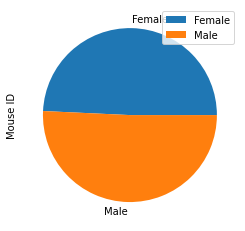

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_dist = pd.DataFrame(study_data.groupby('Sex')["Mouse ID"].count())
sex_pie_pandas = sex_dist.plot.pie(y ='Mouse ID')


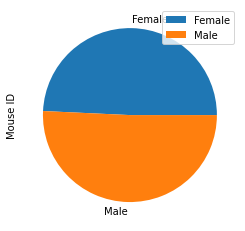

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis_sex = sex_dist.index.tolist()
y_data_sex = sex_dist["Mouse ID"].tolist()

plt.pie(y_data_sex, labels = x_axis_sex)
plt.legend()
plt.ylabel("Mouse ID")

plt.show()


## Quartiles, Outliers and Boxplots

In [15]:
study_data.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [19]:
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mice_final_time = pd.DataFrame(study_data.groupby('Mouse ID')["Timepoint"].tail(1))
mice_final_time

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# mice_final_tumor_list = pd.merge(stuy_data, mice_final_time, how = "inner", on =["Mouse ID"])
# study_data = pd.DataFrame(study_data_ugly)
mice_final_tumor = pd.merge(study_data, mice_final_time, left_index = True, right_index = True).sort_values(by=['Mouse ID'])
mice_final_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
463,a203,Infubinol,Female,20,23,45,67.973419,2,45
473,a251,Infubinol,Female,21,25,45,65.525743,1,45
483,a262,Placebo,Female,17,29,45,70.717621,4,45
493,a275,Ceftamin,Female,20,28,45,62.999356,3,45
500,a366,Stelasyn,Female,16,29,30,63.440686,1,30
...,...,...,...,...,...,...,...,...,...
1857,z435,Propriva,Female,12,26,10,48.710661,0,10
84,z578,Ramicane,Male,11,16,45,30.638696,0,45
1867,z581,Infubinol,Female,24,25,45,62.754451,3,45
1877,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [14]:
# Put treatments into a list for a for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
